In [94]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('./sample_data/train.csv')

In [95]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
data = np.array(data)
print(data.shape)
m, n = data.shape
# m is the number of training examples, n is the number of features + 1 (Y column)
np.random.shuffle(data)

data_dev = data[0:1000].T #Take the first 1000 rows, and transpose the matrix to get 1000 examples as column vectors
data_dev

(42000, 785)


array([[9, 9, 7, ..., 3, 1, 2],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [97]:
Y_dev = data_dev[0] #Takes the first row, which contains all of the answers to the numbers (the Y is what we want)


In [98]:
X_dev = data_dev[1:n] #Takes all of the data corresponding to all of the entries (the X values)
X_dev = X_dev / 255.

In [99]:
data_train = data[1000:m].T
data_train

array([[4, 9, 8, ..., 4, 3, 4],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [100]:
Y_train = data_train[0] #Takes the first row, which contains all of the answers to the numbers
Y_train

array([4, 9, 8, ..., 4, 3, 4])

In [101]:
X_train= data_train[1:n] #Takes all of the data corresponding to all of the entries
X_train
X_train = X_train / 255.
_,m_train = X_train.shape

In [102]:
def params():
  W1 = np.random.rand(10, 784) - 0.5
  b1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  b2 = np.random.rand(10, 1) - 0.5
  return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def der_ReLU(Z):
  return Z > 0

def create(Y):
  column_Y = np.zeros((Y.size, Y.max() + 1))
  column_Y[np.arange(Y.size), Y] = 1
  column_Y = column_Y.T
  return column_Y


def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
  create_Y = create(Y)
  dZ2 = A2 - create_Y
  dW2 =  1/m * dZ2.dot(A1.T)
  db2 = 1/m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * der_ReLU(Z1)
  dW1=  1/m * dZ1.dot(X.T)
  db1 = 1/m * np.sum(dZ1)
  return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2
  return W1, b1, W2, b2


def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size


In [103]:
def gradient_descent(X, Y, iterations, alpha):
  W1, b1, W2, b2 = params()
  for i in range (iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if (i%10 == 0):
      print("Iteration:", i)
      print("Accuracy:", get_accuracy(get_predictions(A2), Y))
  return W1, b1, W2, b2

In [105]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration: 0
[2 2 2 ... 2 7 3] [4 9 8 ... 4 3 4]
Accuracy: 0.11507317073170732
Iteration: 10
[1 1 5 ... 7 8 4] [4 9 8 ... 4 3 4]
Accuracy: 0.24885365853658536
Iteration: 20
[1 4 5 ... 7 8 4] [4 9 8 ... 4 3 4]
Accuracy: 0.34070731707317076
Iteration: 30
[1 9 5 ... 4 8 4] [4 9 8 ... 4 3 4]
Accuracy: 0.4032439024390244
Iteration: 40
[1 9 5 ... 4 8 4] [4 9 8 ... 4 3 4]
Accuracy: 0.4504146341463415
Iteration: 50
[1 9 5 ... 4 8 4] [4 9 8 ... 4 3 4]
Accuracy: 0.5014878048780488
Iteration: 60
[1 9 5 ... 9 8 4] [4 9 8 ... 4 3 4]
Accuracy: 0.5475365853658537
Iteration: 70
[1 9 5 ... 9 8 4] [4 9 8 ... 4 3 4]
Accuracy: 0.5812195121951219
Iteration: 80
[1 9 5 ... 9 8 4] [4 9 8 ... 4 3 4]
Accuracy: 0.61
Iteration: 90
[1 9 5 ... 9 8 4] [4 9 8 ... 4 3 4]
Accuracy: 0.6331219512195122
Iteration: 100
[1 9 5 ... 9 8 4] [4 9 8 ... 4 3 4]
Accuracy: 0.6527804878048781
Iteration: 110
[4 9 5 ... 9 8 4] [4 9 8 ... 4 3 4]
Accuracy: 0.6696829268292683
Iteration: 120
[4 9 5 ... 9 8 4] [4 9 8 ... 4 3 4]
Accuracy: 0

Prediction:  [4]
Label:  4


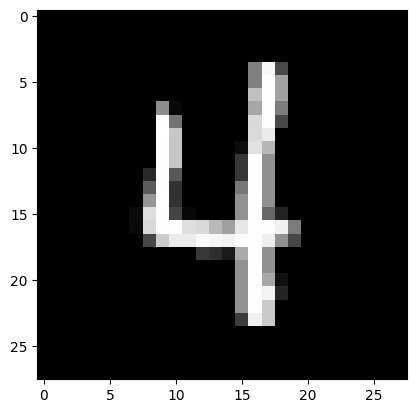

Prediction:  [9]
Label:  9


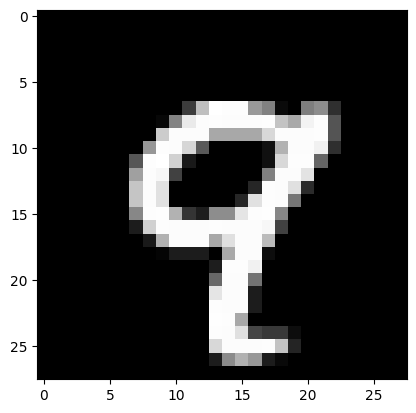

Prediction:  [8]
Label:  8


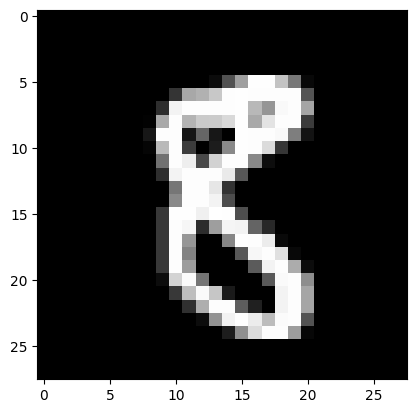

Prediction:  [4]
Label:  4


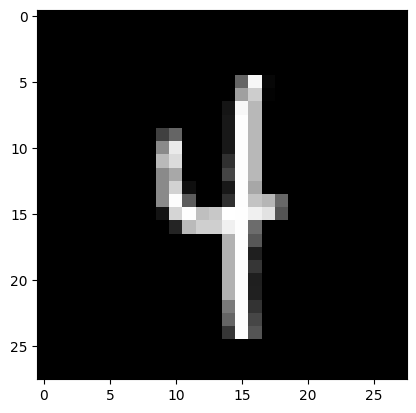

[4 9 7 9 0 5 8 0 7 9 6 8 9 7 7 1 4 7 2 9 9 5 5 4 7 2 9 5 3 6 9 8 4 8 4 5 0
 7 1 9 2 4 9 1 6 5 3 2 4 9 2 3 2 4 1 5 1 4 2 4 0 2 2 4 6 4 3 8 9 3 4 6 5 6
 4 7 0 0 1 4 5 0 3 4 6 3 3 3 4 0 0 9 5 3 0 1 2 7 7 6 9 9 1 6 6 8 4 3 7 9 0
 1 2 8 8 2 3 3 1 7 3 6 3 2 4 2 1 1 7 3 7 5 2 7 6 7 2 3 2 5 8 0 6 9 1 2 7 4
 8 3 3 6 5 7 8 6 3 3 3 1 0 8 0 1 4 2 2 1 5 1 0 6 2 1 3 1 6 0 3 9 6 1 2 2 3
 4 7 3 6 0 6 1 7 2 5 2 6 0 9 1 9 5 9 5 7 6 9 4 9 0 1 4 6 9 6 5 7 3 2 7 5 4
 0 5 6 4 8 9 8 5 7 2 5 5 9 8 5 6 9 2 7 1 3 6 9 8 7 5 7 7 8 0 8 2 0 6 1 1 1
 1 3 2 1 2 3 1 8 0 6 3 8 2 6 2 5 8 0 3 2 6 6 0 7 0 8 7 6 9 2 2 1 9 5 1 4 9
 7 5 1 1 4 5 7 2 3 2 5 2 2 7 6 0 3 7 8 8 2 5 9 3 2 0 4 6 2 5 5 5 7 3 3 5 3
 2 5 9 4 0 7 3 9 7 2 7 0 8 2 5 1 7 1 6 8 1 6 9 0 6 9 3 8 0 5 3 1 5 1 3 6 3
 2 1 3 8 1 8 6 4 5 1 6 7 9 1 7 0 8 4 4 2 4 6 3 3 3 8 4 3 6 3 8 4 0 6 2 4 3
 0 9 3 2 2 3 3 0 6 0 4 3 4 6 8 3 8 1 3 3 0 1 3 6 8 4 1 4 6 2 1 5 6 2 1 5 1
 8 3 4 3 6 7 7 7 6 6 0 0 1 1 1 3 1 9 6 0 7 9 6 6 2 5 9 9 3 2 8 8 5 4 3 2 1
 9 3 5 5 8 6 3 1 5 5 8 2 

0.849

In [108]:
def make_predictions(X, W1, b1, W2, b2):
    #Do one set of forward propogation, then try to predict the data properly
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)